In [2]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [21]:
from glob import glob
img_dir = glob('*/*.jpg', recursive=True)[1]

In [26]:
image = cv2.imread(img_dir, 0)

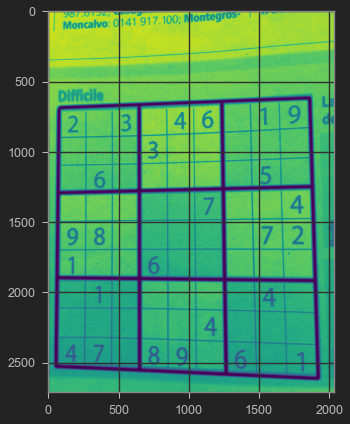

In [27]:
plt.imshow(image)

In [42]:
thresh, img_bin = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_bin = 255 - img_bin

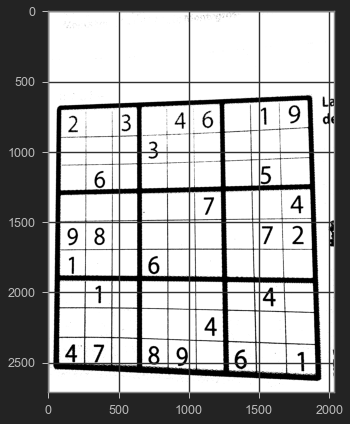

In [43]:
plt.imshow(255 - img_bin, cmap='gray')

In [44]:
kernel_length = np.array(image).shape[1] // 80
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))

In [45]:
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

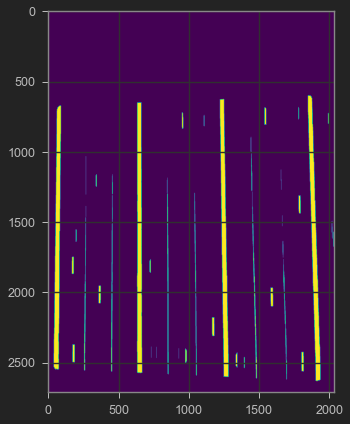

In [46]:
img_temp1 = cv2.erode(img_bin, vertical_kernel, iterations=3)
vertical_lines_img = cv2.dilate(img_temp1, vertical_kernel, iterations=3)

plt.imshow(vertical_lines_img)

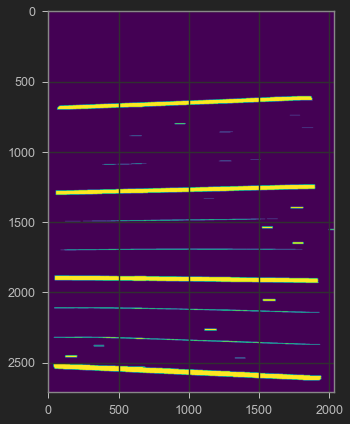

In [48]:
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
hori_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)

plt.imshow(hori_lines_img)

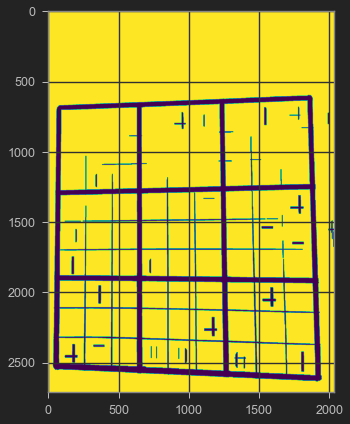

In [49]:
alpha = 0.5
beta = 1 - alpha

img_final_bin = cv2.addWeighted(vertical_lines_img, alpha, hori_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)

thresh, img_final_bin = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(img_final_bin)

In [65]:
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [66]:
len(contours)

79

In [67]:
imgContours = image.copy()

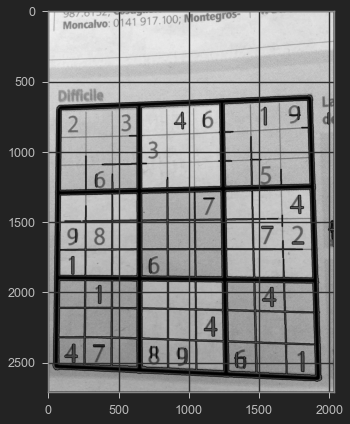

In [68]:
cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 3)
plt.imshow(imgContours, cmap='gray')

In [64]:
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [70]:
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

In [72]:
idx = 0
for c in contours:
    x, y, w, h = cv2.boundingRect(c)

    if (w > 80 and h > 20) and w > 3 * h:
        idx += 1
        new_img = image[y: y +h, x: x + w]
        cv2.imwrite(f"./cropped_dir/{str(idx) + '.png'}", new_img)

    if (w > 80 and h > 20) and w > 3 * h:
        idx += 1
        new_img = image[y: y +h, x: x + w]
        cv2.imwrite(f"./cropped_dir/{str(idx) + '.png'}", new_img)